FAKE NEWS ANALYSIS (POLITICS DATA SETS)

1- Let's import the differents libraries

In [185]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yassineseidou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2- Importing The Data sets and verifying outliers

In [186]:
#Importing Data sets

df_true = pd.read_csv("/Users/yassineseidou/Desktop/PROJETS TECHNIQUE/PROJET D'IA - DEEP FAKES:FAKE NEWS/FINALS_DOCS/IA/FakeNewsDetection/True.csv") #Data set with True informations
df_fake = pd.read_csv("/Users/yassineseidou/Desktop/PROJETS TECHNIQUE/PROJET D'IA - DEEP FAKES:FAKE NEWS/FINALS_DOCS/IA/FakeNewsDetection/Fake.csv") #Data set with Fake informations

df_true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [110]:
df_fake

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [111]:
#Verifying missing values 

print(df_true.isnull().sum())
print(df_fake.isnull().sum())

title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [187]:
df_true.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182

In [188]:
df_fake.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

In [114]:
df_true.info()
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Now let's add a variable to each Data Set : As the datasets we currently have are already splited, one about True informations and another about false informations, let's add the y variable name 'Is_Fake'. For all the populations in data set True Is_Fake = 0 and for all the elements in data set False Is_Fake = 1.

In [189]:
#isfake = 0 then the information is true

df_true ['isfake'] = 0 
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

In [190]:
#isfake = 1 then the information is False

df_fake ['isfake'] = 1
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  isfake  
0  December 31, 2017       1  
1  December 31, 2017       1  
2  December 30, 2017       1  
3  December 29, 2017       1  
4  December 25, 2017       1

Now let's concatenate the two datasets and then reset the index of our new data set

In [191]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  isfake  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

In [192]:
df.drop(columns = ['date'], inplace = True)  #here we put inplace = True to ensure that the informations are going to be deleted in the machine memory. If it was false, the column would be deleted but not in the machine memory

#WARNING : ALREADY EXECUTED. DON'T EXECUTE IT TWICE

In [193]:
df = df.drop_duplicates().reset_index(drop=True)

In [195]:
df.describe()

isfake
count  44685.000000
mean       0.525389
std        0.499361
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

In [196]:
#Let's create a new variable composed by the title of the text and the text itself

df['original'] = df['title'] + ' ' + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  isfake  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       0   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       0   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       0   

                                            original  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

NATURAL LANGUAGE PROCESS 

In [200]:
nltk.download("stopwords") #In the NLP process we need to delete the stopwords, the word having no value for the analysis
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yassineseidou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yassineseidou/nltk_data...


True

In [121]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) #we can add stopwords that are not present in the initial list
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [122]:
len(stop_words)

184

In [230]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

PREPROCESSING TREATMENT

In [231]:
def preprocess(text):
    result = [] #creating a list where i'll append my tokens 
    for token in gensim.utils.simple_preprocess(text): #iterating in the next conditions on all the token generated 
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words: #verifying if the token is not present in the stopword of Gensim, in the customized stopwords and if the token length is superior to 3
            token = lemmatizer.lemmatize(token)
            token = stemmer.stem(token)
            result.append(token) #If condition verified, append the tokens to the list created 
            
    return result

In [232]:
df['clean'] = df['original'].apply(preprocess) #Now we create a new variable by applying the prepocess function. The new variable doesn't have the stopwords then 

In [233]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  isfake  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       0   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       0   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       0   

                                            original  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                               clean  \
0  [budget, fight, loom, republican, flip, fiscal...   
1  [militari, accept, transgend, recruit, monday,...   
2  [senior, republican, senat, mueller, washingto...   
3  [russia, probe, help, australian, diplomat, wa...   
4  [trump, want, postal, servic, charg, amazon, s...   

                                        clean_joined  
0  budget fight loom republican flip fiscal scrip...  
1  military accept transgender recruit monday pen...  
2  senior republican senator mueller washington r...  
3  russia probe helped australian diplomat washin...  
4  trump want postal service charge amazon shipme...

In [234]:
list_of_words = [] #creating a list where i'll append the words present in the variable 'clean'
for i in df.clean: #iterating on all the elements of the variable 'clean'
    for j in i: #iterating on all the words present in each element of the variable 'clean'
        list_of_words.append(j) #then append all the words to my list 


len(list_of_words)

9223828

In [235]:
list_of_words

['budget',
 'fight',
 'loom',
 'republican',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuter',
 'head',
 'conserv',
 'republican',
 'faction',
 'congress',
 'vote',
 'month',
 'huge',
 'expans',
 'nation',
 'debt',
 'cut',
 'call',
 'fiscal',
 'conserv',
 'sunday',
 'urg',
 'budget',
 'restraint',
 'keep',
 'sharp',
 'pivot',
 'republican',
 'repres',
 'mark',
 'meadow',
 'speak',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'feder',
 'spend',
 'lawmak',
 'brace',
 'battl',
 'januari',
 'return',
 'holiday',
 'wednesday',
 'lawmak',
 'begin',
 'tri',
 'pa',
 'feder',
 'budget',
 'fight',
 'like',
 'link',
 'issu',
 'immigr',
 'polici',
 'novemb',
 'congression',
 'elect',
 'campaign',
 'approach',
 'republican',
 'seek',
 'control',
 'congress',
 'presid',
 'donald',
 'trump',
 'republican',
 'want',
 'budget',
 'increas',
 'militari',
 'spend',
 'democrat',
 'want',
 'proport',
 'increas',
 'defens',
 'discretionari',
 'spend',
 'program',
 'support',
 'educ',
 'scientif',
 

In [236]:
total_words = len(list(set(list_of_words))) #number of uniques words in the list
total_words

83965

In [237]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x)) #here we crate a new variable where the elements of the variable 'clean' are converted from list to a string 


In [238]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44680  McPain: John McCain Furious That Iran Treated ...   
44681  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44682  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44683  How to Blow $700 Million: Al Jazeera America F...   
44684  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44680  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44681  21st Century Wire says It s a familiar theme. ...   Middle-east   
44682  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44683  21st Century Wire says Al Jazeera America will...   Middle-east   
44684  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

       isfake                                           original  \
0           0  As U.S. budget fight looms, Republicans flip t...   
1           0  U.S. military to accept transgender recruits o...   
2           0  Senior U.S. Republican senator: 'Let Mr. Muell...   
3           0  FBI Russia probe helped by Australian diplomat...   
4           0  Trump wants Postal Service to charge 'much mor...   
...       ...                                                ...   
44680       1  McPain: John McCain Furious That Iran Treated ...   
44681       1  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44682       1  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44683       1  How to Blow $700 Million: Al Jazeera America F...   
44684       1  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                   clean  \
0      [budget, fight, loom, republican, flip, fiscal...   
1      [militari, accept, transgend, recruit, monday,...   
2      [senior, republican, senat, mueller, washingto...   
3      [russia, probe, help, australian, diplomat, wa...   
4      [trump, want, postal, servic, charg, amazon, s...   
...                                                  ...   
44680  [mcpain, john, mccain, furiou, iran, treat, sa...   
44681  [justic, yahoo, settl, mail, privaci, class, a...   
44682  [sunnistan, alli, safe, zone, plan, territori,...   
44683  [blow, million, jazeera, america, final, call,...   
44684  [navi, sailor, held, iranian, militari, sign, ...   

                                            clean_joined  
0      budget fight loom republican flip fiscal scrip...  
1      militari accept transgend recruit monday penta...  
2      senior republican senat mueller washington reu...  
3      russia probe help australian diplomat washingt...  
4      trump want postal servic charg amazon shipment...  
...                                                  ...  
44680  mcpain john mccain furiou iran treat sailor ce...  
44681  justic yahoo settl mail privaci class action l...  
44682  sunnistan alli safe zone plan territori booti ...  
44683  blow million jazeera america final call quit c...  
44684  navi sailor held iranian militari sign neocon ...  

[44685 rows x 7 columns]

In [239]:
df['original'][44684]

'10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt 21st Century Wire says As 21WIRE predicted in its new year s look ahead, we have a new  hostage  crisis underway.Today, Iranian military forces report that two small riverine U.S. Navy boats were seized in Iranian waters, and are currently being held on Iran s Farsi Island in the Persian Gulf. A total of 10 U.S. Navy personnel, nine men and one woman, have been detained by Iranian authorities. NAVY STRAYED: U.S. Navy patrol boat in the Persian Gulf (Image Source: USNI)According to the Pentagon, the initial narrative is as follows: The sailors were on a training mission around noon ET when their boat experienced mechanical difficulty and drifted into Iranian-claimed waters and were detained by the Iranian Coast Guard, officials added. The story has since been slightly revised by White House spokesman Josh Earnest to follow this narrative:The 2 boats were traveling en route from Kuwait to Bahrain, when the

In [240]:
df['original'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District 

VISUALIZATIONS

<Axes: xlabel='count', ylabel='isfake'>

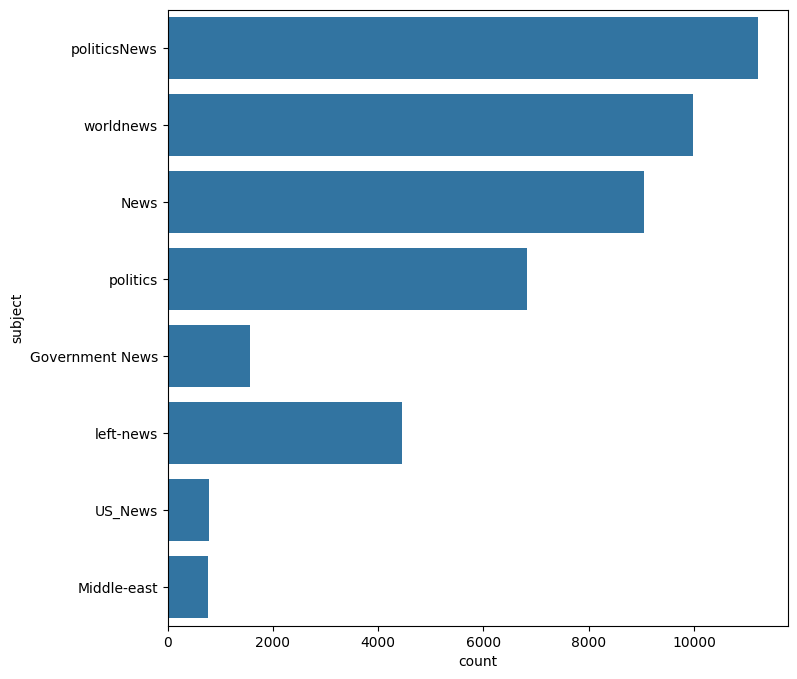

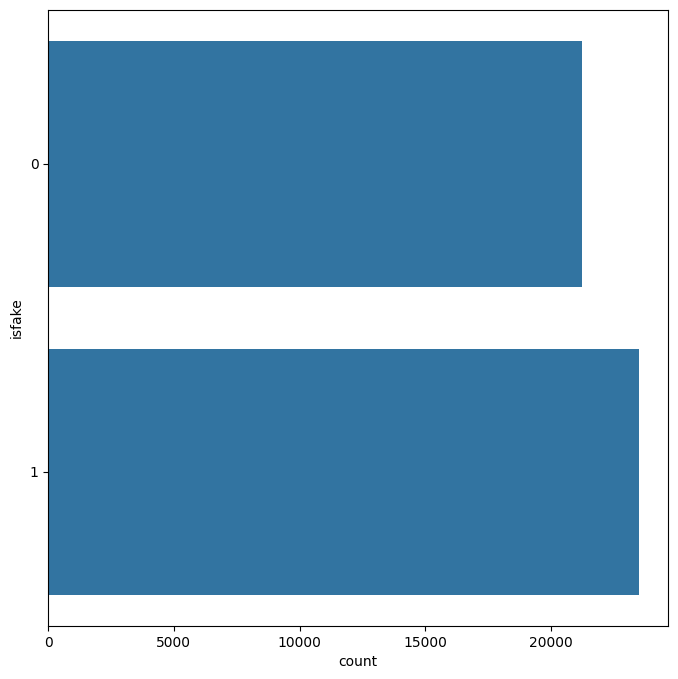

In [213]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

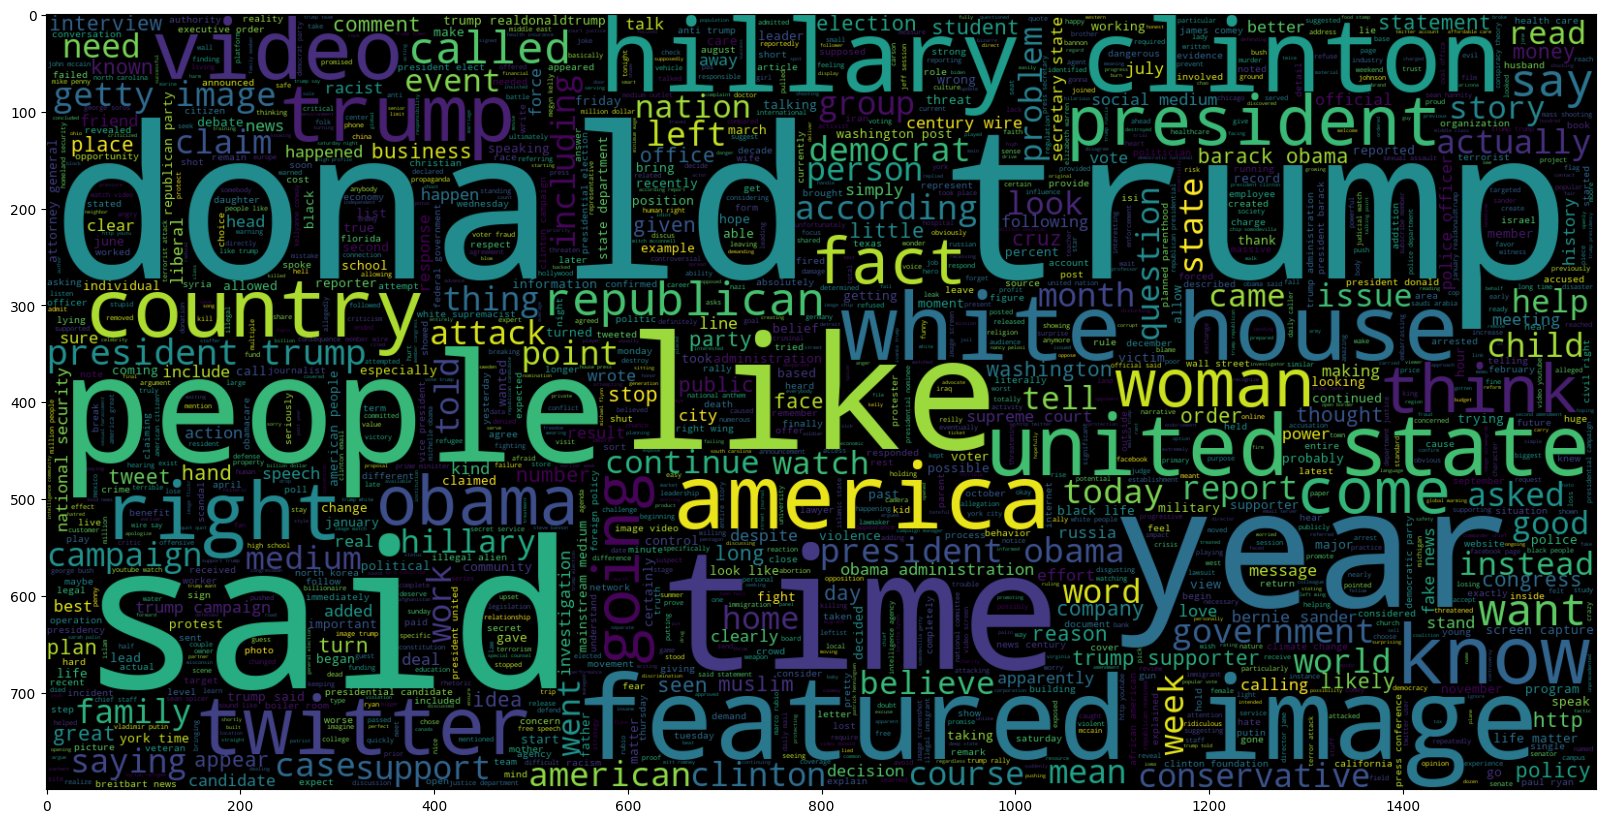

In [214]:
#Word Cloud of Fake News

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

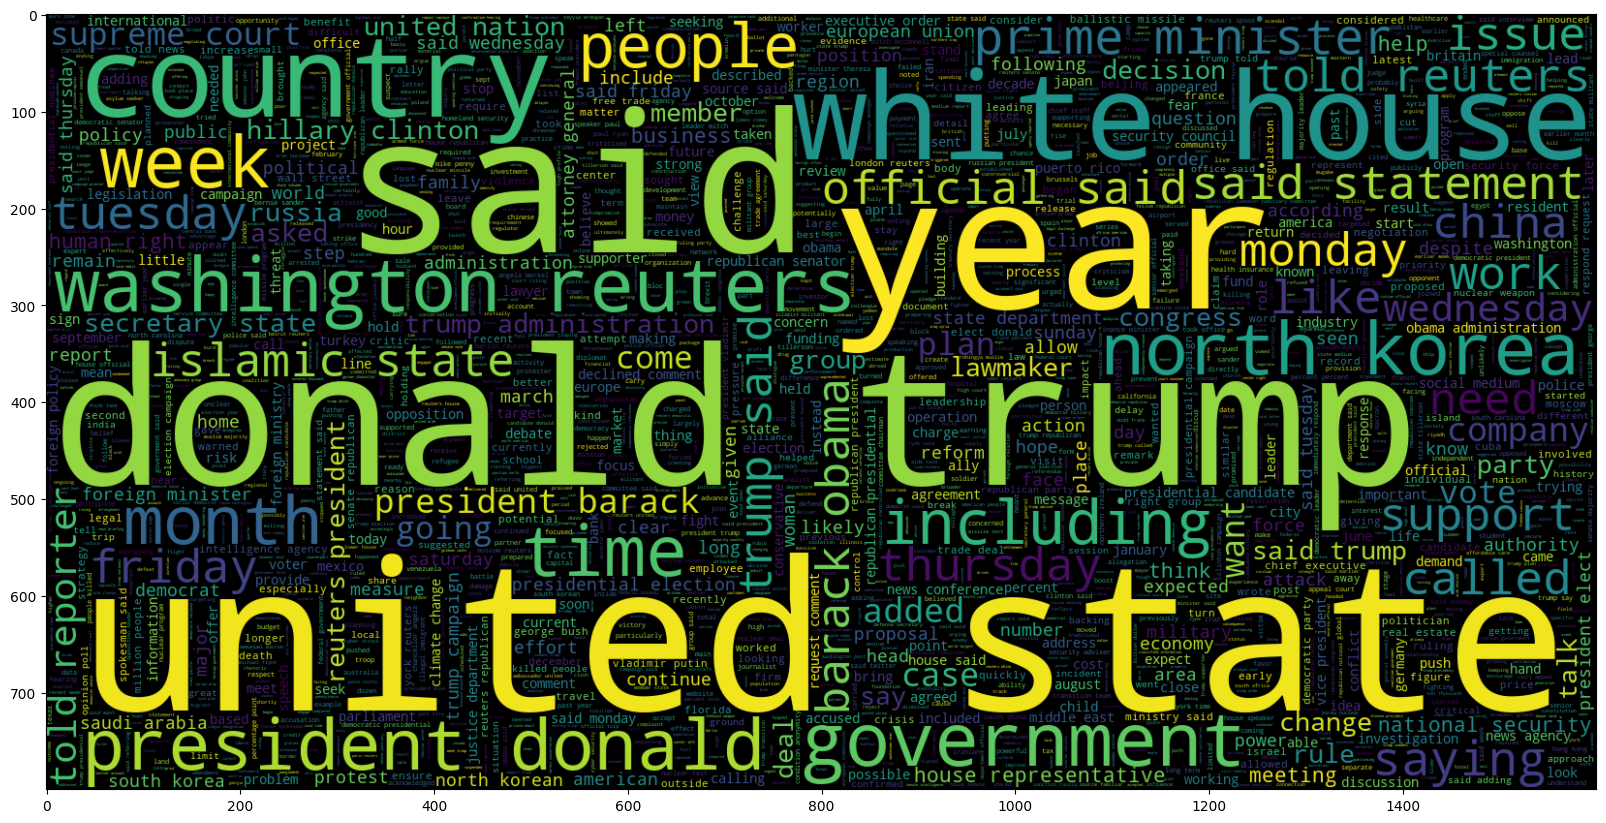

In [215]:
#Word cloud of True News 

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [241]:
maxlen = -1 #this variable is initalized to stock the max length in all the documents 
for doc in df.clean_joined: #iteration on all the elements of the variable 'clean_joined'
    tokens = nltk.word_tokenize(doc) #tokenizing the text of all doc and append it to tokens
    avglen = np.mean(len(tokens))
    if(maxlen<len(tokens)): #verifying if the max length is lower than the tokens length
        maxlen = len(tokens) #if yes append maxlen take automatically the value of the lenght of the tokens
print("The maximum number of words in any document is =", maxlen)
print("The maximum number of words in any document is =", avglen)


The maximum number of words in any document is = 4405
The maximum number of words in any document is = 450.0


In [217]:
# visualize the distribution of number of words in a text

import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

Preparing data by performing tokenization and padding

Tokenizer allows us to vectorize text corpus by turning each text into a sequence of integers


In [242]:

# split data into test and train 

x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [243]:
x_train

24992    happen trump advis lay plan nation muslim regi...
23120    trump rip apart demand clinton apolog fake thi...
43232    georgia judg suspend compar attack monument is...
22729    deputi attorney gener piss trump order reason ...
32160    neworlean black patriot readi fight antifa con...
                               ...                        
5025     texa committe pass curb transgend bathroom acc...
42882    ironi video flag stompin rapper wayn start fig...
39285    twist liber kindergarten teacher allow transge...
4590     hous republican reject bid obtain trump return...
44510    dalla attack dialect summer uncl dyer centuri ...
Name: clean_joined, Length: 35748, dtype: object

In [244]:
y_train

24992    1
23120    1
43232    1
22729    1
32160    1
        ..
5025     0
42882    1
39285    1
4590     0
44510    1
Name: isfake, Length: 35748, dtype: int64

In [245]:
x_test

28973    governor hold emerg confer discu trump scari r...
5379     meet israel netanyahu trump back away commit p...
32648    unreal florida immigr politician intimid voter...
5327     franc say want penni clarifi trump stanc munic...
10357    block pakistan sale fail senat washington reut...
                               ...                        
44350    flashback chill minut interview georg soro nea...
31373    break news presid trump speak charlottesvil tr...
31320    steve bannon announc leav white hous news left...
37955    truth appl govern american care win american n...
170      senat mccain treat effect cancer therapi washi...
Name: clean_joined, Length: 8937, dtype: object

In [246]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words


tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])



The encoding for document
 budget fight loom republican flip fiscal script washington reuter head conserv republican faction congress vote month huge expans nation debt cut call fiscal conserv sunday urg budget restraint keep sharp pivot republican repres mark meadow speak face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pa feder budget fight like link issu immigr polici novemb congression elect campaign approach republican seek control congress presid donald trump republican want budget increas militari spend democrat want proport increas defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr will go increas defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say need govern rais percent fiscal conserv rational eventu peopl money said meadow republican vote late decemb parti debt financ overhaul ex

In [247]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results


padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')


for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)


padded_train


The padded encoding for document 1  is :  [  181     1   382  3097    50    19   101  5689   135   683    15    21
  6601 13392     8    18     1 15950   203     1   728  6335  5824    26
  1552   219   404   226   907  1477   171    67   238   822  1035  3260
  2428   533   101  5689]
The padded encoding for document 2  is :  [   1 2347 1313  446   11 1014  486   99  169   18    1 1295   78  249
   62  343  545  146  745  609  140  571   18 4711 5516  102 2841   41
   11   41   11 1014  279  578  280    1  169   80   41   11]


array([[  181,     1,   382, ...,   533,   101,  5689],
       [    1,  2347,  1313, ...,    80,    41,    11],
       [ 1541,   231,  1224, ...,  1701,   100,  1137],
       ...,
       [ 2752,   286,  5907, ..., 31717,  3306,   183],
       [   10,     7,   648, ...,    35,   569,    19],
       [ 1974,    49,  7994, ...,   630,    13,  2827]], dtype=int32)

In [248]:
#Build and train the model


# Sequential Model

model = Sequential()

# embeddidng layer

model.add(Embedding(total_words, output_dim = 128))
#model.add(Embedding(total_words, output_dim = 240))


In [249]:
# Bi-Directional RNN and LSTM

model.add(Bidirectional(LSTM(128)))

# Dense layers

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

total_words




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         10747520  
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11043713 (42.13 MB)
Trainable params: 11043713 (42.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


83965

In [250]:
y_train = np.asarray(y_train)

# train the model


model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

#assess trained model performance

#save the model

#model.save('fnmodel.h5')


Epoch 1/2
503/503 [==============================] - 37s 72ms/step - loss: 0.0403 - acc: 0.9849 - val_loss: 0.0040 - val_acc: 0.9989
Epoch 2/2
503/503 [==============================] - 37s 73ms/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0062 - val_acc: 0.9989


In [179]:
model.save('my_model2.keras')

In [251]:
# make prediction

pred = model.predict(padded_test)
pred


280/280 [==============================] - 3s 9ms/step


array([[9.9869365e-01],
       [6.0876069e-08],
       [9.9961013e-01],
       ...,
       [9.9985832e-01],
       [9.9997735e-01],
       [1.8516429e-08]], dtype=float32)

In [253]:
# if the predicted value is >0.5 it is real else it is fake

prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

# getting the accuracy

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9985453731677296


<Axes: >

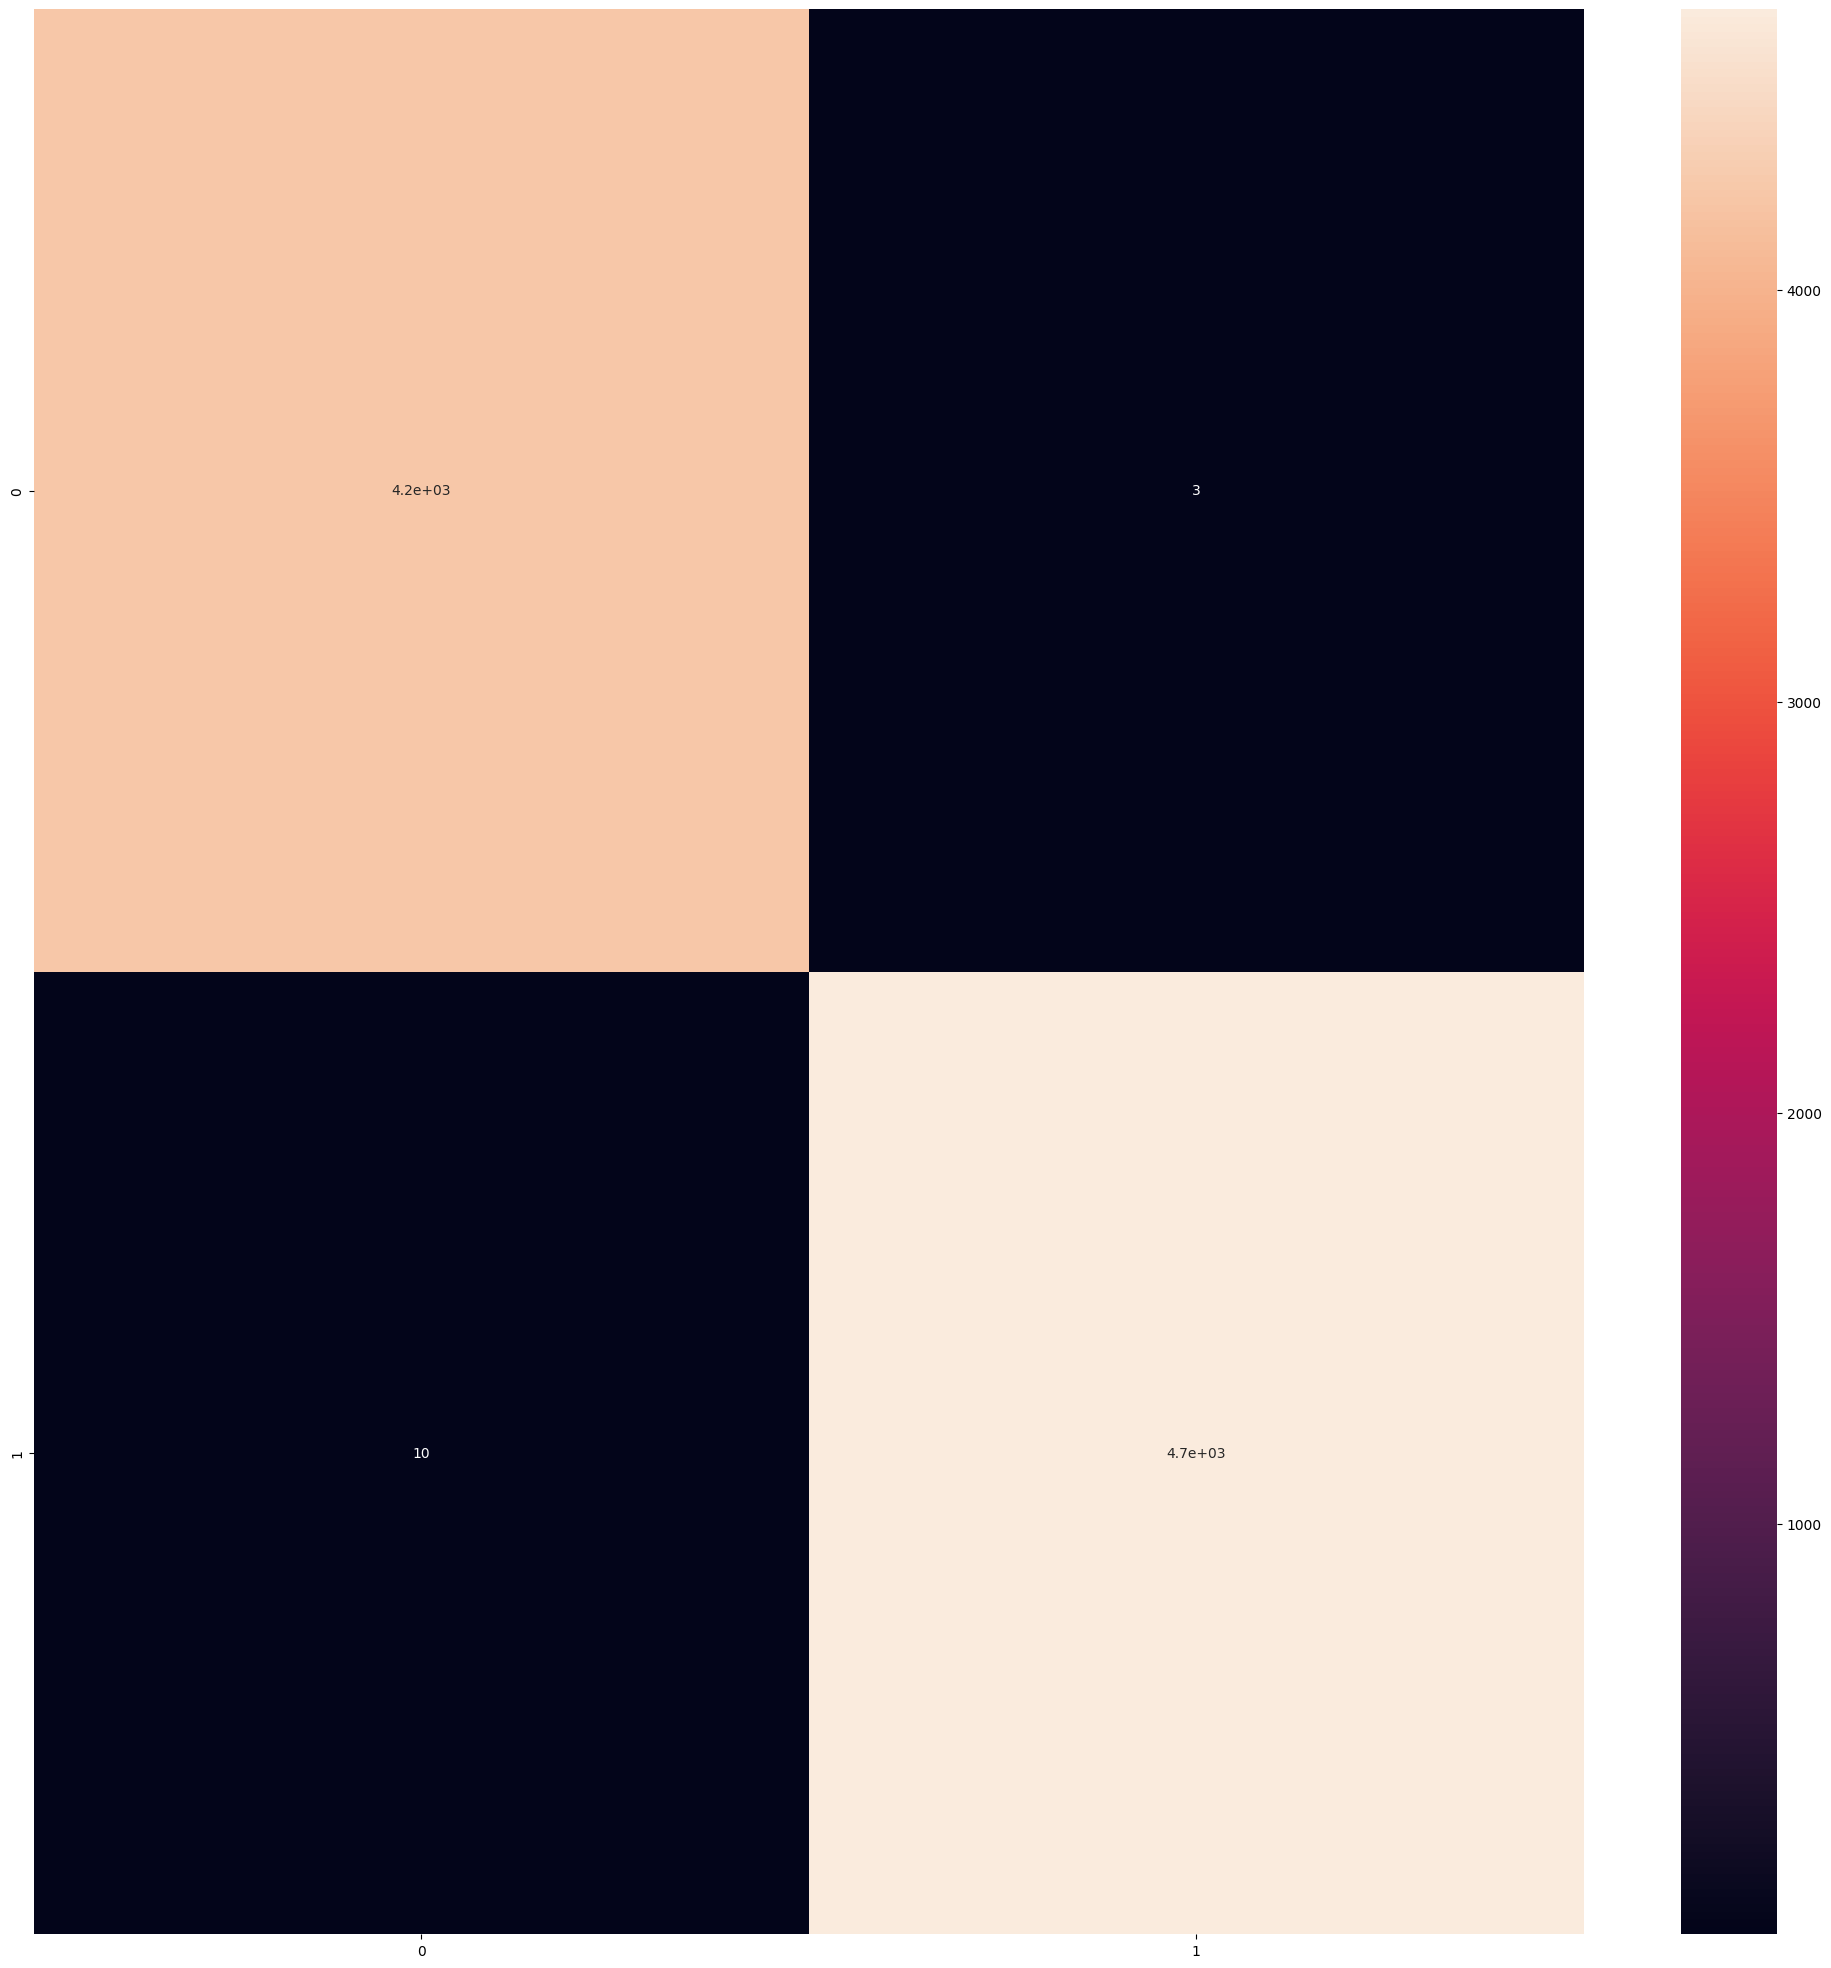

In [254]:
# get the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [168]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}
category

{0: 'Fake News', 1: 'Real News'}

In [152]:
mean_prediction = np.mean(prediction)
std_deviation = np.std(prediction)

print(mean_prediction)
print(std_deviation)

confidence_level = 0.95
conf = 0.85

from scipy.stats import norm

z_value = norm.ppf((1 + conf) / 2)

z_factor = 1.96 

lower_bound = mean_prediction - (z_factor * std_deviation)
upper_bound = mean_prediction + (z_factor * std_deviation)

lower_bound2 = mean_prediction - (z_value * std_deviation)
upper_bound2 = mean_prediction + (z_value * std_deviation)

print(lower_bound)
print(upper_bound)

print(lower_bound2)
print(upper_bound2)

0.540423162583519
0.49836328910419003
-0.4363688840606935
1.5172152092277313
-0.17698647604236284
1.2578328012094007


PREDICTION FUNCTION : Here the user just have to provide a text as an input

In [255]:
def FakeNewsPredictor(model, sentence):
    # Initialize the WordNetLemmatizer and PorterStemmer
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    # Lemmatize each word in the sentence
    sentence_tokens = nltk.word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in sentence_tokens]
    
    # Stem each lemmatized token
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]
    
    # Join the stemmed tokens into a sentence
    stemmed_sentence = " ".join(stemmed_tokens)
    
    # Tokenize the stemmed sentence
    sentence_tokens = tokenizer.texts_to_sequences([stemmed_sentence])
    
    # Pad the tokenized sentence
    padded_sentence = pad_sequences(sentence_tokens, maxlen=40, padding='post', truncating='post')
    
    # Make prediction
    prediction_sentence = model.predict(padded_sentence)
    if prediction_sentence [0][0]>= 0.5 :
        return 'This is a fake news'
    else :
        return 'This is not a fake news'


In [256]:
sentence = " Trumps inauguration: After a divisive election season, Donald Trump officially became the 45th President of the United States on January 20, 2017. In a 16-minute inaugural address (the shortest since Jimmy Carters in 1977), Trump repeated his America First campaign slogan in which he delivered a dark-toned nationalist, populist message. The slogan “America First” has its origins in the America First Committee, a group founded in 1940 to oppose U.S. involvement in World War II that was often characterized by its anti-Semitic, pro-fascist rhetoric. In his address, Trump embraced the legacy of Andrew Jackson, Americas seventh president, and the first to win on an anti-establishment populist platform."

FakeNewsPredictor (model, sentence)

1/1 [==============================] - 0s 15ms/step


'This is a fake news'

Let's try another model : Logistic Regression 

In [257]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression( solver='liblinear').fit(padded_train, y_train)

yhat = LR.predict(padded_test)


In [258]:
prediction2 = []
for j in range(len(yhat)):
    if yhat[j].item() > 0.5:
        prediction2.append(1)
    else:
        prediction2.append(0)

# getting the accuracy

accuracy = accuracy_score(list(y_test), prediction2)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.597404050576256


Let's try another model : Support Vector Machine

In [259]:
from sklearn import svm


clf = svm.SVC(kernel='rbf')
clf.fit(padded_train, y_train)

yhat2 = clf.predict(padded_test)
yhat2 [0:5]



array([0, 0, 1, 0, 0])

In [260]:
prediction3 = []
for j in range(len(yhat2)):
    if yhat2[j].item() > 0.5:
        prediction3.append(1)
    else:
        prediction3.append(0)

# getting the accuracy

accuracy = accuracy_score(list(y_test), prediction3)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.6283987915407855


SVM Model got an accuracy of 55% , not good but acceptable

Let's try another model :  KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Classification

k = 4

#train Model and predict

neigh = KNeighborsClassifier(n_neighbors= k).fit(padded_train, y_train)
neigh

yhat3 = neigh.predict(padded_test)
yhat3 [0:5]

array([0, 0, 0, 1, 1])

In [ ]:
prediction4 = []
for j in range(len(yhat3)):
    if yhat3[j].item() > 0.5:
        prediction4.append(1)
    else:
        prediction4.append(0)

# getting the accuracy

accuracy = accuracy_score(list(y_test), prediction4)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.5819599109131404


KNN is better than SVM with 58% of accuracy

Improve the LSTM model